<a href="https://colab.research.google.com/github/SotaYoshida/Lecture_DataScience/blob/main/notebooks/Python_misc_ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 常微分方程式の数値解法

In [ ]:
#使用するモジュールのimport
import numpy as np
from matplotlib import pyplot as plt

## 常微分方程式

多くの自然現象や社会現象は微分方程式として定式化される。

身近な例としてはニュートンの運動方程式にはじまり、
金融や群集動態、感染症のモデルなどにも当てはまる。

このノートでは、微分方程式のうちとくに一変数関数の場合である  
常微分方程式(ordinary differential equation, ODE)について  
いくつかの代表的な数値解法を解説するとともに、  
アルゴリズムを自分で実装してみよう。

例えば1階の常微分方程式は、一般に以下の形で書くことが出来る:  
$dx(t)/dt = f(x,t)$ (Eq. 1)

これは、ある質点の時刻$t$での座標を$x(t)$と呼ぶことにすると、  
質点の位置の変化が$f(x,t)$の関数として書けるような状況に相当する。

注) 別に$t$は時間である必要はないし、  
$x(t)$は座標以外の量(金融商品の価格など)何でも構わない。


一般に常微分方程式が与えられた時、まずはその解が変数分離などを用いて  
閉じた形で書き下せないかと考えるわけだが、  
実際の多くの問題ではそうは上手く行かず、数値計算が必要となる。

以下では、主として$dx/dt = f(x,t)$を考えるが、  
高階の微分を含む場合も、

$$
\left[
\begin{matrix} 
x_1 \\ 
x_2 \\
\vdots \\
x_r
\end{matrix}
\right]
= 
\left[
\begin{matrix} 
x \\ 
dx/dt \\
\vdots \\
d^{r-1}x/dt^{r-1}
\end{matrix} \right]
$$

と置き換えれば、連立1階常微分方程式:

$$
\left[
\begin{matrix} 
x_2 \\ 
x_3 \\
\vdots \\
x_{r}
\end{matrix}
\right]
= 
\frac{d}{dx}
\left[
\begin{matrix} 
x_1 \\ 
x_2 \\
\vdots \\
x_{r-1} 
\end{matrix} \right]
$$
とみなすことが出来る。


常微分方程式の解を求めるためには、 
適切な条件(初期条件や境界条件)を設定しなければならない。

そのうち、変数$t$の最初の値(初期値,初期条件)$t_0$と  
$x(t=t_0)$の値が与えられた問題を初期値問題と呼ぶ。  
※$t_0$は問題によって0だったり、$-\infty$だったりする。


解の存在性や下記のリプシッツ条件など適切な条件の元での  
解の一意性の証明等については教科書に譲る。

###リプシッツ条件

関数$f$が$U$(たとえば$R^n$の部分集合) 上でリプシッツ(Lipshitz)連続であるとは、  
正実数$K$が存在し、任意の$x,y \in U$に対し、  
$||f(x)-f(y)|| \leq K ||x −y||$が成立することである。  
以下では$||\cdot||$はユークリッドノルムとし、$K$をリプシッツ定数と呼ぶ。

この$K$が存在しているとき、  
前述の常微分方程式の初期値問題は一意の解を持つ。

## 代表定期な数値解法

### オイラー(Euler)法

1階の常微分方程式$dx(t)/dt=f(x,y)$を数値的に解く上で  
最も基本的な考え方は時刻(便宜上そう呼ぶ)を  
細かく分割した上で、$x$の任意時刻$t$での近似値を  
初期値から初めて逐次的に求めていくことである。  

以下では、その最も単純な例であるオイラー法を説明する。

微分の定義:
$dx(t)/dt = \lim_{h\to 0} \frac{x(t+h) - x(t)}{h}$から  
微小変分$h$を十分小さく取れば、  
$x_{i+1} = x_{i} + h f(x,t_i)$という近似式が得られる。

つまり、$i=0$の初期値$(x_0,t_0=0)$から順番に上の漸化式を用いて、  $i$番目の時刻$t_i$での座標$x_i$を推定していく。

※一般に微小変分$h$は各ステップ$i$に依存しても良いが、簡単のため共通とした。

例: $dx/dt = -2x^2t$, 初期条件$x(t=0)=1.0$のもとで  
$0 < t \leq 1.0$での$x$の値を予想してみよう:

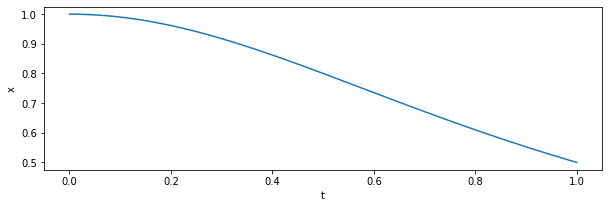

In [ ]:
# f(x,t)のトイモデルとして dx/dt = -2tx^2 というものを考える
def f(x,t): 
    return -  2.0*  x * x * t
#時刻tを間隔hで細かく分割する
h = 1.e-4
tr = np.arange(0.0,1.0,h) 
#初期条件
x0 = 1.0 

#求解
x = x0
xs = [x0]
for t in tr:
    x += h * f(x,t)
    xs += [x]

#描画
fig = plt.figure(figsize=(10,3))
plt.xlabel("t");plt.ylabel("x")
plt.plot(tr,xs[:-1])
plt.show()
plt.close()

実は今の初期条件のもとでこの微分方程式は  
閉じた形$x(t)=x_0/(x_0t^2+1)$で解が与えられるので、  
真の解と数値解法による近似解を比較できる。

差分のlogを取ってみると...以下のようになる:

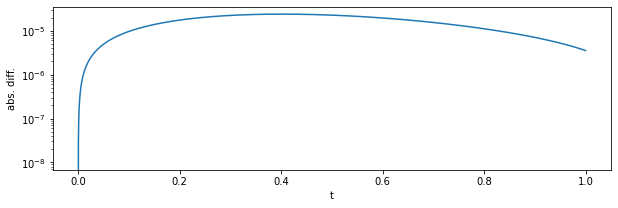

In [ ]:
def fexact(t):
    return x0/(x0* t*t + 1.0)
xe = np.array([ fexact(t) for t in tr])
fig = plt.figure(figsize=(10,3))
plt.xlabel("t"); plt.ylabel("abs. diff.")
plt.yscale("log")
plt.plot(tr,abs(xe-np.array(xs[:-1])))
plt.show()
plt.close()

Taylor展開するだけで簡単に調べられるようにEuler法は局所打ち切り誤差が$O(h^2)$、  
大局打切り誤差が$\sim O(h^2)\times O(h^{-1})\sim O(h)$の手法となっている。  
つまり1桁精度を上げたいなら$h$を1/10、つまり計算量を10倍にしなくてはならない。

上の$h$を変えてチェックしてみよう。  

大局誤差が$h$の$p$乗に比例する手法を一般に$p$次公式と呼び  
上のEuler法は1次公式となる。

Euler法に少し工夫を加えた修正Euler法は、2次公式であり  
$h$を1/10すると、大局誤差は1/100にできる。  



### 4次のルンゲクッタ法 (RK4)

次に4次公式の代表例である4次のルンゲクッタ法を紹介しよう。  
古典的ルンゲ=クッタ法などとも呼ばれるこの方法は、  
幾つかの$(x,t)$に対して$f(x,t)$の値を計算し、  
打切り誤差が互いにキャンセルしあうように  
うまく重み付けをして次ステップの$x$の値を求めていく方法であり  
様々なところで用いられている。

基本的には2変数関数のTaylor展開をやれば更新式を導出できるが
煩雑なので導出については省略することにして結果だけ示すと

$i$番目のステップでの$x,t$の値$x_i,t_i$が所与のとき、
以下の4点での$f(x,t)$の(近似)値を用意して  
$ f_1 = f(x_i,t_i),
f_2 = f(x_i+\frac{h}{2} f_1,t_i+\frac{h}{2}),$
$f_3 = f(x_i+\frac{h}{2} f_2,t_i+\frac{h}{2}),
f_4 = f(x_i+h f_3,t_i+h)
$

$x_{i+1} = x_{i} + \frac{h}{6} (f_1+2f_2+2f_3 + f_4 )$
とすることで、4次公式が得られる。

また、前述のような"重み付け"の選択には自由度があり、  
$ f_1 = f(x_i,t_i),
f_2 = f(x_i+\frac{h}{3} f_1,t_i+\frac{h}{3}),$
$
f_3 = f(x_i-\frac{h}{3}f_1 + h f_2,t_i+\frac{2h}{3}),
f_4 = f(x_i+hf_1-hf_2+h f_3,t_i+h)
$

$x_{i+1} = x_{i} + \frac{h}{8} (f_1+3f_2+3f_3 + f_4 )$

という公式も知られている。


前者を実装して、先程の例でEuler法と比べてみると...



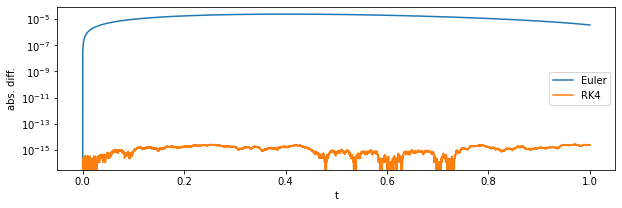

In [ ]:
#求解(RK4)
xsRK4 = [x0]
x = x0
for t in tr:
    f1 = f(x,t)
    f2 = f(x+0.5*h*f1, t+0.5*h)
    f3 = f(x+0.5*h*f2, t+0.5*h)
    f4 = f(x+h*f3, t+h)
    x += h*(f1 + 2*f2 + 2*f3 + f4)/6.0
    xsRK4 += [x]
#描画
fig = plt.figure(figsize=(10,3))
plt.xlabel("t");plt.ylabel("abs. diff.")
plt.yscale("log")
plt.plot(tr,abs(xe-np.array(xs[:-1])),label="Euler")
plt.plot(tr,abs(xe-np.array(xsRK4[:-1])),label="RK4")
plt.legend()
plt.show()
plt.close()

となり、高精度で解が得られていることが分かる。

## 積分を用いた解法

常微分方程式 $\frac{dx}{dt} = f(x,t)$は形式的には  
$x(t') = x(t_0) + \int^{t'}_{t_0} f(x(t),t,) dt$ と書くことが出来る。

右辺の積分を数値的に計算することで、  
元の微分方程式の解を求めることを考えよう。

### Adams-Bashforth法



以下では特に、Adams-Bashforth法(AB法)と呼ばれる手法を考える。




まずは、2次のAB法を考えよう。

$t_i$と$t_{i+1}$の間の$f(x(t),t)$を、現在居る$i$番目のステップと  
1個前の$i-1$番目のステップを用いて、1次のLagrange補間で近似してみる。

$
\begin{align} 
x_{i+1} &= x_i + \int^{t_{i+1}}_{t_i} P_1(t) dt  \\
P_1(t) &= f_{i-1}L_{i-1}(t) + f_i L_i(t) \\
L_{i-1} &= \frac{t-t_i}{t_{i-1}-t_i}, L_{i} = \frac{t-t_{i-1}}{t_{i}-t_{i-1}}
\end{align}$

各ステップの刻み幅$t_{i}-t_{i-1}$ for $\forall i $を一定$h$としよう。  
このもとで上の積分を評価すると、  
$x_{i+1} = x_i + \frac{h}{2} (-f_{i-1}+3f_i)$
という更新式を得る。

この手法の局所打切り誤差は(またTaylor展開して)$O(h^3)$であり、  
２次の公式となる。一般的な分類に倣えば、この手法は過去の2ステップの情報を利用する、  
陽(explicit)解法かつ２段法(2-step method)となっている。


同様にして、一般に$m$ステップのAB法($n-1$次のLegendre補間を使用)は$m$次公式を与える。  
たとえば4次公式は$x_{i+1}=x_i + \frac{h}{24}(-9f_{i-3} + 37f_{i-2} -59f_{i-1} +55f_{i})$




**Adams-Bashforth法とRunge-Kutta法の違い**

AB法では、過去に評価した$f$の値を用いるため、計算量の増加を防ぐことができる。  
つまり、各$f$の評価は１回だけで良い。  
一方で、RK4では各ステップで$f$を４回計算する必要がある。

これは$f$の評価が複雑な場合  
(例えば解きたい微分方程式が行列(連立)になっていて、$f$に行列演算を含む場合など)  
Runge-Kutta法よりも、高速に計算できるかもしれない。

一方で、$m$次のAB法では過去の情報を利用するため、  
はじめの$m-1$回については、RK法などで予め求めておく必要がある。  
また、Runge-Kutta法と比較すると、誤差が大きかったり、  
数値的に不安定になりやすいことも知られている。

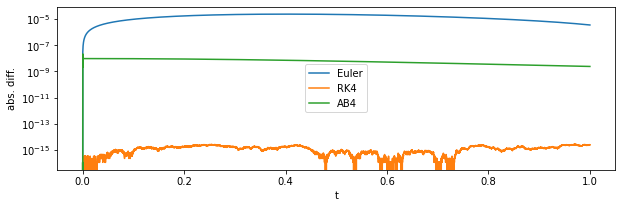

In [ ]:
def AB4(x0,m=4):
    xsAB = [x0]
    x = x0
    fs = [ 0.0 for i in range(m)]
    for i,t in enumerate(tr):
        if len(xsAB) < m : #RK4
            f1 = f(x,t)
            f2 = f(x+0.5*h*f1, t+0.5*h)
            f3 = f(x+0.5*h*f2, t+0.5*h)
            f4 = f(x+h*f3, t+h)
            x += h*(f1 + 2*f2+ 2*f3 + f4)/6.0
            fs[0] = f1; fs[1] = f2; fs[2] = f3; fs[3] = f4
        else:
            f1,f2,f3 = fs[1:]
            f4 = f(x,t)
            x += h *(-9*f1 +37*f2 -59*f3 +55*f4 )/24.0 
            fs[0] = f1; fs[1] = f2; fs[2] = f3; fs[3] = f4
        xsAB += [x]
    return xsAB

xsAB4 = AB4(x0)
#描画
fig = plt.figure(figsize=(10,3))
plt.xlabel("t");plt.ylabel("abs. diff.")
plt.yscale("log")
plt.plot(tr,abs(xe-np.array(xs[:-1])),label="Euler")
plt.plot(tr,abs(xe-np.array(xsRK4[:-1])),label="RK4")
plt.plot(tr,abs(xe-np.array(xsAB4[:-1])),label="AB4")
plt.legend()
plt.show()
plt.close()

### Adams-Moulton法

AB法は、現在$i$と過去のステップの情報のみを使用したが、  
$i+1$ステップの情報を使う(陰解法)ことで、より高精度の結果を得ることができる。

3次のAB法($i-2,i-1,i$の情報)に加えて$i+1$番目の情報を用いて  
3次のLagrange補間多項式$P_3(t)=\sum^2_{j=-1}f_{i-j}L_{i-j}$のもと  
$x_{i+1}=x_i + \sum^2_{j=-2} f_{i+j}  \int^{t_{i+1}}_{t_i} L_{i+j}(t) dt $
という  
更新式を考える。愚直に上と同様に各積分を評価すると  
$x_{i+1}=x_i + \frac{h}{24}(f_{i-2}-5f_{i-1}+19f_{i} +9f_{i+1}) $
という式が得られる。

これは、４次精度の公式になっており、3ステップ(4次)のAdams-Moulton法と呼ばれる。  
右辺にある$f_{i+1}$の評価に関する計算コストの分だけ、3次のAB法に比べて増えることになる。


### Adams-Bashforth-Moulton法

AM法とAB法を組み合わせることで、使いやすい高精度な陽解法を作ろう  
というのが予測子修正子法の発想である。

4ステップのAB法を予測子, 4ステップのAM法を修正子として採用すると  
以下の更新式が得られる:

$\begin{align}
x^{P}_{i+1} &= x_i + \frac{h}{24}(-9f_{i-3}+37f_{i-2}-59f_{i-1}+55f_i) \\
x_{i+1} &= x_i + \frac{h}{24}(f_{i-2}-5f_{i-1}+19f_i + 9f(t_{i+1},x^P_{i+1}))
\end{align}
$


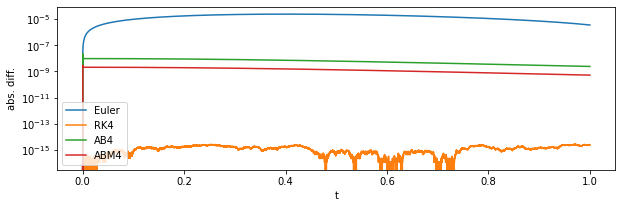

In [ ]:
def ABM(x0,m=4):
    xsABM = [x0]
    x = x0
    fs = [ 0.0 for i in range(m)]
    for i,t in enumerate(tr):
        if len(xsABM) < m : #RK4
            f1 = f(x,t)
            f2 = f(x+0.5*h*f1, t+0.5*h)
            f3 = f(x+0.5*h*f2, t+0.5*h)
            f4 = f(x+h*f3, t+h)
            x += h*(f1 + 2*f2+ 2*f3 + f4)/6.0
            fs[0] = f1; fs[1] = f2; fs[2] = f3; fs[3] = f4
        else:
            f1,f2,f3 = fs[1:]; f4 = f(x,t)
            ## 予測子
            xp = x + h *(-9*f1+37*f2-59*f3+55*f4) / 24.0            
            f5 = f(xp,t+h)
            ## 修正子
            x += h *(f2 -5*f3 +19*f4 +9*f5 )/24.0 
            fs[0] = f1; fs[1] = f2; fs[2] = f3; fs[3] = f4
        xsABM += [x]
    return xsABM

xsABM = ABM(x0)
fig = plt.figure(figsize=(10,3))
plt.xlabel("t");plt.ylabel("abs. diff.");plt.yscale("log")
plt.plot(tr,abs(xe-np.array(xs[:-1])),label="Euler")
plt.plot(tr,abs(xe-np.array(xsRK4[:-1])),label="RK4")
plt.plot(tr,abs(xe-np.array(xsAB4[:-1])),label="AB4")
plt.plot(tr,abs(xe-xsABM[:-1]),label="ABM4")
plt.legend();plt.show();plt.close()

1桁程度、AB法よりも精度が改善していることがわかる。